In [1]:
from uszipcode import SearchEngine
import pandas as pd



/home/eamonn-walsh/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


  ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20  \
0     47236   47236        B5   G6350          S  1029063         0   
1     47870   47870        B5   G6350          S     8830         0   
2     47851   47851        B5   G6350          S    53326         0   
3     47337   47337        B5   G6350          S   303089         0   
4     47435   47435        B5   G6350          S    13302         0   

    INTPTLAT20    INTPTLON20  \
0  +39.1517426  -085.7252769   
1  +39.3701518  -087.4735141   
2  +39.5735839  -087.2459559   
3  +39.8027537  -085.4372850   
4  +39.2657557  -086.2951577   

                                            geometry  
0  POLYGON ((-85.73410 39.15597, -85.72794 39.156...  
1  POLYGON ((-87.47414 39.37016, -87.47409 39.370...  
2  POLYGON ((-87.24769 39.57450, -87.24711 39.574...  
3  POLYGON ((-85.44357 39.80328, -85.44346 39.803...  
4  POLYGON ((-86.29592 39.26547, -86.29592 39.266...  


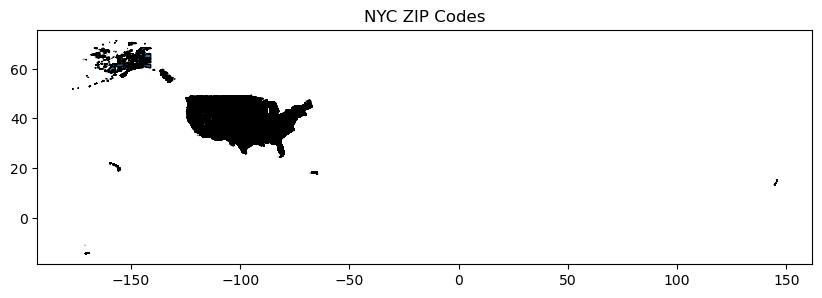

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = 'tl_2022_us_zcta520/tl_2022_us_zcta520.shp'  # Replace with the path to your shapefile
gdf = gpd.read_file(shapefile_path)

print(gdf.head())

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='k')
ax.set_title('NYC ZIP Codes')
plt.show()


In [1]:
from uszipcode import SearchEngine
import pandas as pd

# Initialize the search engine
search = SearchEngine()

# Define latitude and longitude bounds
lat_lower_bound = 40.492
lat_upper_bound = 40.916
long_lower_bound = -74.254
long_upper_bound = -73.698

# Search for ZIP codes within the given latitude and longitude bounds
results = search.by_coordinates(
    lat=(lat_lower_bound + lat_upper_bound) / 2,
    lng=(long_lower_bound + long_upper_bound) / 2,
    radius=15,  # Adjust the radius to cover the required area
    returns=10000
)

# Prepare data for CSV
data = []
for result in results:
    data.append({
        'zipcode': result.zipcode,
        'city': result.major_city,
        'state': result.state,
        'lat': result.lat,
        'lng': result.lng,
        'population': result.population,
        'population_density': result.population_density,
        'land_area': result.land_area_in_sqmi,
        'water_area': result.water_area_in_sqmi
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter results within the exact bounds
nyc_zipcodes = df[
    (df['lat'] >= lat_lower_bound) &
    (df['lat'] <= lat_upper_bound) &
    (df['lng'] >= long_lower_bound) &
    (df['lng'] <= long_upper_bound)&
     (df['state'] == 'NY')
]
nyc_zipcodes_pd = pd.DataFrame(nyc_zipcodes)

# Save to CSV
nyc_zipcodes_pd.to_csv('nyc_zipcodes_data.csv', index=False)
print(nyc_zipcodes_pd.shape)
print("NYC ZIP code data has been saved to 'nyc_zipcodes_data.csv'")

/home/eamonn-walsh/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


(237, 9)
NYC ZIP code data has been saved to 'nyc_zipcodes_data.csv'


In [2]:
nyc_zipcodes_pd.to_csv('nyc_zipcodes_data.csv', index=False)
nyc_zipcodes_pd.columns

Index(['zipcode', 'city', 'state', 'lat', 'lng', 'population',
       'population_density', 'land_area', 'water_area'],
      dtype='object')

(198,)
0


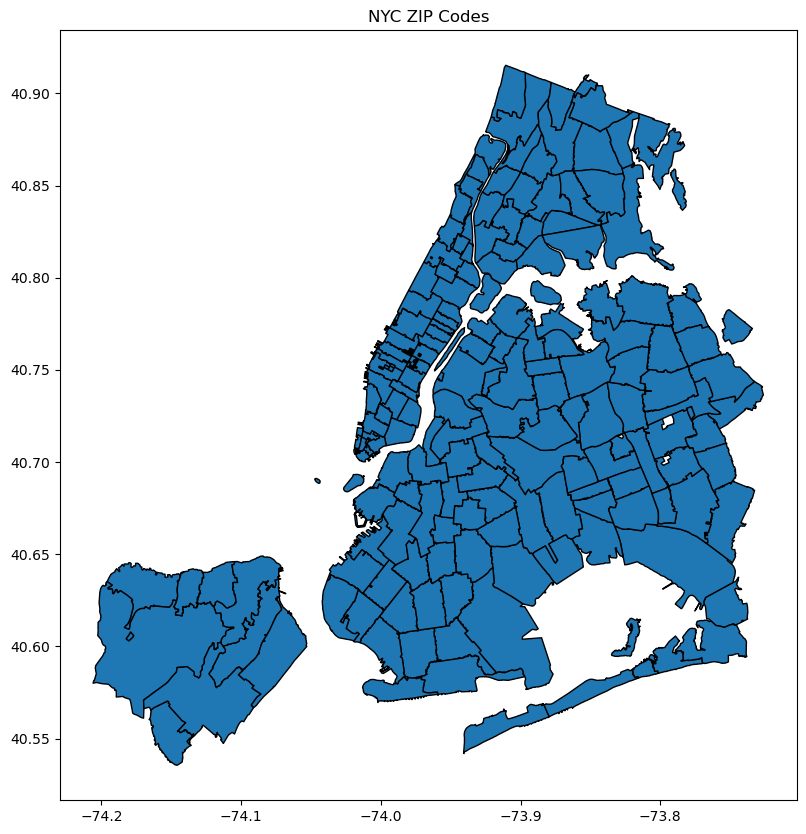

In [3]:
from uszipcode import SearchEngine
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
# Initialize the search engine
search = SearchEngine()

lat_lower_bound = 40.492
lat_upper_bound = 40.916
long_lower_bound = -74.254
long_upper_bound = -73.698

# Search for ZIP codes within the given latitude and longitude bounds
results = search.by_coordinates(
    lat=(lat_lower_bound + lat_upper_bound) / 2,
    lng=(long_lower_bound + long_upper_bound) / 2,
    radius=15,  # Adjust the radius to cover the required area
    returns=10000
)

# Filter results within the exact bounds
nyc_zipcodes = [
    result.zipcode for result in results
    if lat_lower_bound <= result.lat <= lat_upper_bound and
       long_lower_bound <= result.lng <= long_upper_bound
]

shapefile_path = 'tl_2022_us_zcta520/tl_2022_us_zcta520.shp'  # Replace with the path to your shapefile
gdf = gpd.read_file(shapefile_path)
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')


nyc_gdf = gdf[gdf['ZCTA5CE20'].isin(nyc_zipcodes_pd["zipcode"])]
geo = nyc_gdf["geometry"]
geo_2 = nyc_gdf[["ZCTA5CE20","geometry"]]
print(geo.shape)
print(geo.isna().sum())
combined_df = pd.concat([nyc_zipcodes_pd, gdf], ignore_index=True)
if not nyc_gdf.empty:
    fig, ax = plt.subplots(figsize=(10, 10))
    geo.plot(ax=ax, edgecolor='k')
    ax.set_title('NYC ZIP Codes')
    plt.show()
else:
    print("No ZIP codes found within the specified bounds.")


In [4]:
print(nyc_zipcodes_pd.shape)
combined_df.columns

(237, 9)


Index(['zipcode', 'city', 'state', 'lat', 'lng', 'population',
       'population_density', 'land_area', 'water_area', 'ZCTA5CE20', 'GEOID20',
       'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20',
       'INTPTLAT20', 'INTPTLON20', 'geometry'],
      dtype='object')

In [5]:
combined_df.head()

,zipcode,city,state,lat,lng,population,population_density,land_area,water_area,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,10002,New York,NY,40.71,-73.99,81410.0,92573.0,0.88,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,10041,New York,NY,40.71,-73.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,10045,New York,NY,40.71,-73.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,10055,New York,NY,40.71,-73.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,10060,New York,NY,40.71,-73.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [6]:
combined_df['geometry'].isna().sum()

237

In [7]:
geo_2.to_csv('nyc_geo.csv', index=False)

In [8]:
for i in geo_2:
    print(i)

ZCTA5CE20
geometry


In [11]:
nyc_gdf.columns

Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry'],
      dtype='object')

In [12]:
geo_2['geometry'].isna().sum()

0

In [13]:
nyc_gdf.dtypes

ZCTA5CE20       object
GEOID20         object
CLASSFP20       object
MTFCC20         object
FUNCSTAT20      object
ALAND20          int64
AWATER20         int64
INTPTLAT20      object
INTPTLON20      object
geometry      geometry
dtype: object